It is always amazing to see how insights can be generated by data scientists. However, in real life, not all the collected data set can be directly analyzed by the estabilsh tools mainly because of its chaotic nature. 80% of data scientists' time is actually spent on cleaning of the data. So it is important to understand how to handle the messy data and transfer it into organized data ready for further processing.

In this project, we will be introducing some basic techniques that can be applied to the majority of dataset to change super messy data into messy data. It is highly likely that after applying all these techniques, your dataset is still not fully ready because each dataset has its unique problems. And you need to adjust it based on problems. However, know these techniques will definitely help you broaden your way of thinking so 

All of the graphs and code can be found in the MBAN GitHub repository, feel free to download it and modify the numbers for your use case. The Jupyter notebook can be opened in the executable environment binder.

# Business Problem

Why do we really need to clean the data before applying the statistical analysis to generate business insights? In order to answer this question, we need to know there is a gap between raw data and the insights which managers want to get. Let's use the Retail industry as an example. Some questions that are usually asked in the industry are:
 * Which geographic location provides the most profits per person?
 * What type of customers generate the revenue for us?

However, the raw data set can only record each transaction for customers who enrolled within the loyalty program. And in the process of recording, we can possible miss some of the information required to solve the problem:
 * The transaction only record the name of the store but you have no idea where that store is.
 * The customers are not willing to share gender and age due to privacy issue.

In such scenario, if we directly apply the statistical methods to the raw data set, we might get weird result:
 * The stores in happyland(possibly a community with only 1000 residents)provides the most profits per person.
 * The customers who are not willing to share their gender generate the most revenue.
 
Those insights are only "right" statistically. In business context, they provides no value because we can't have more stores in a community with only 1000 residents, and knowing customer who care about their privacy generate the most revenue doesn't provide a good descriptive term to know who they truly are. So data cleanning is really important in closing the gap.

Let's try to understand how to do it with an example. Here we have a dataset which describes the constuction happens around neighborhoods, can you tell me which neighborhood has the most type 3 construction project?

## Data Set Check

In [1]:
import pandas as pd
import numpy as np
import warnings

# This step prevent warning from showing up for formatting purpose,but ignore this line while practicing yourself
warnings.filterwarnings("ignore")

mydata = pd.read_csv("data/Building_Permits.csv")

In [2]:
mydata.head(1)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945


Before moving into data cleaning, we need to understand what is happening in the dataset so that we can know in which way the data set is "sick:. It is obvious that there are lots of NaN values existing in the dataset. We definitely don't want NA values here otherwise we will be having "security concerning customer" issue. That extra space and and NA value would be what we want to look at first.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

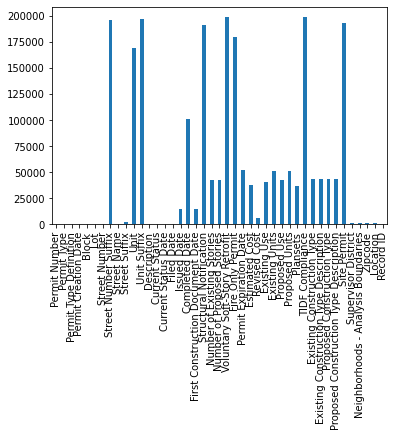

In [4]:
# get info about all columns
mydata.info()

# create some exploratory visualization
mydata.isna().sum().plot(kind='bar')

# Data Cleaning

## Step 1 : Get Rid Of Extras Spaces

---

In [1]:
string = "   hello world     "

print(string)
print("="*100)

fresh_string = string.strip()
print(fresh_string)

   hello world     
hello world


The simple example here show that when there are unneeded spaces before the string and after the string, we want to make sure we can get rid of them.

Then we can apply the same methodology to the entire data set. The major reason why we want to do this is because the extra spaces will lead to both analytical and formatting issue. It is not nice to have extra sapces in front of strings. More importantly, while doing logistic regression analysis," hello" and "hello" in system means two different factors while they are the same in real life.  


## Step 2 ：Replacing All NA Values

---

The second step is the most obvious step that we should do. Which is to replace the NA values existing within the dataset with some value that will not influence the analysitcal result. However, there are several techniques that can be applied here:

The first method is fast and easy. We can simply substitute all of them to 0 if we want to get the sum of a column(because 0 does not influence the value of the sum).

In [26]:
test_row = mydata.iloc[0:5]
test_row.fillna(0, inplace=True)
test_row.head(1)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,0,Ellis,St,...,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945


But this methodology is definitely wrong since the proposed construction type description can not be 0. It should be a string instead of number. So how do we want to handle this scenarios since this is a column of strings?

There is simple methodology that can also be applied. We substitute it with the majority of the column. This is particularly useful when we are searching for outliers within the dataframe.

In [7]:
test_row = mydata.iloc[0:100]

test_row['Proposed Construction Type Description'].fillna(test_row['Proposed Construction Type Description'].value_counts()[:1].index.tolist()[0],inplace=True)
#using fillna command while inplace = true to replace the value
#test_row['Proposed Construction Type Description'].value_counts()[:1].index.tolist()[0] returns the most frequent value appear with in the column
test_row.head(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,wood frame (5),NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,wood frame (5),NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,wood frame (5),NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


Then some of NAs in the proposed Construction Type Description is successfully change to wood frame(5) which is the most frequent value in the column.

## Step 3 : Convert string into float/integer

---

When we are doing numeric analysis(for example, get the mean value), it is possible that the system will return an error saying that you can't apply the mathematical command to strings. So we want to make sure all numbers are "int" format number instead of string so that it is ready for further analysis.

Covert String into numbers in excel can be really messy. However, in python it is really simple to acheive it. Here we introcude two simple command: float and int.

In [30]:
test_row = mydata.iloc[0:5]
test_row['Permit Type'].astype(float)

0    4.0
1    4.0
2    3.0
3    8.0
4    6.0
Name: Permit Type, dtype: float64

In [31]:
test_row = mydata.iloc[0:5]
test_row['Permit Type'].astype(int)

0    4
1    4
2    3
3    8
4    6
Name: Permit Type, dtype: int64

Float command is able to convert the number appear in scientific nutation while int is able to handle non-base int values. So be flexible with two commands


## Step 4 : Remove Unnecessary Duplicates

---

Some times rows with same content will appear twice in your dataframe and you definitely don't want it. How could we handle the unnecessary duplicates?

In [9]:
# create a sample df with 2 rows and fewer columns (for demonstration)
test_df = mydata[['Permit Number', 'Permit Type', 'Block']].iloc[0:2]
# create a df with double info
dup_df = pd.concat([test_df, test_df])
dup_df.head()

# just to demonstrate, see which rows have duplicates
dup_df['Duplicate'] = dup_df.duplicated()
dup_df

# or if you have a unique identifier (like permit number) you can also use it to drop duplicates
# dup_df.drop_duplicates

,Permit Number,Permit Type,Block,Duplicate
0,201505065519,4,0326,False
1,201604195146,4,0306,False
0,201505065519,4,0326,True
1,201604195146,4,0306,True


Here we have the duplicated rows and we want get rid of the excess rows. We use drop duplicate command to achieve it.

In [11]:
test_df.drop_duplicates()

,Permit Number,Permit Type,Block
0,201505065519,4,0326
1,201604195146,4,0306


## Step 5 : Finding iut potential mismatch

---

The error here is not the typical error that we are getting in python. It is more refering as the logical error in the dataset. It is easier to explain with the dataset.

In [39]:
test_df1 = mydata.iloc[0:5]
test_df1.head(1)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,0,Ellis,St,...,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945


Then what can be a potential mismatch in the dataframe?

Within the dataframe we can see one column called the "Existing Construction Type" and another one called "Existing Constuction Type Description". If we are have a type value of 3 but the the description is constr type 4, then there's definitely some problems happens here.

For a Existing Construction Type of 3, the Existing Construction Type Description would be constr type 3. There is a fixed relationship here. Any rows with different value can be considered as "error" and we need to fix them when we are cleaning the data.

We can Check the mismatch occur or not first:

In [12]:
(mydata.groupby(['Existing Construction Type', 'Existing Construction Type Description'])
    .size()
    .reset_index()
    .rename(columns={0:'count'}))

,Existing Construction Type,Existing Construction Type Description,count
0,1.0,constr type 1,28072
1,2.0,constr type 2,4068
2,3.0,constr type 3,9663
3,4.0,constr type 4,381
4,5.0,wood frame (5),113350


Then let's assume some problems actually happens here:

In [62]:
test_df1["Existing Construction Type"].unique()
print("There are 3 construction Types which are 1, 3 and 5")
print()
print("="*100)
print()

def errorcheck(a):
    if a["Existing Construction Type"] == 3.0:
        a["Existing Construction Type Description"] = "constr type 3"
    if a["Existing Construction Type"] == 1.0:
        a["Existing Construction Type Description"] = "constr type 1"
    if a["Existing Construction Type"] == 5.0:
        a["Existing Construction Type Description"] = "wood frame (5)"

There are 3 construction Types which are 1, 3 and 5




In [67]:
for index, row in test_row.iterrows():
    errorcheck(row)
test_row.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,0,ellis,St,...,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,0,geary,St,...,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,0,pacific,Av,...,1.0,constr type 1,1.0,constr type 1,0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,0,pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,0,market,St,...,3.0,constr type 3,0.0,0,0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [14]:
#there are alternative methods for doing this cleaning
#or use apply and lambda with a simplified function

# a simpler function 

def constr_type(x):
    if x == 3.0:
        descr = "constr type 3"
    elif x == 1.0:
        descr = "constr type 1"
    elif x == 5.0:
        descr = "wood frame (5)"
    else:
        descr = None
    return(descr)

new_df = test_df1
new_df['New Description'] = new_df['Existing Construction Type'].apply(lambda x: constr_type(x))


# or you can map a dictionary
constr_dict = {1.0: "constr type 1",
              3.0: "constr type 3",
              5.0: "wood frame (5)"}

new_df['New Description2'] = new_df['Existing Construction Type'].map(constr_dict)
new_df

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,New Description,New Description2
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,NaN,wood frame (5),NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945,constr type 3,constr type 3
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,NaN,wood frame (5),NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718,constr type 3,constr type 3


## Step 6 : Upper/Lower Cases

---

This might be irrelavant to the construction data set. However, there are many reasons that why Upper or Lower case should be considered in data cleaning. There might be human errors while inputing the error and some of the NLP algorithm recognized capitalized data as a facter to express strong opinion. So you want to make sure you are cautious with the case selection.

One of the universal way to remove the case influence is to change everything to upper case first, then lower case again. By doing this, all the cases will be removed.

For example, if we want to remove the Capital letter at the beginning of the street names:

In [44]:
test_row = mydata.iloc[0:5]
test_row["Street Name"] = test_row["Street Name"].str.upper();print(test_row["Street Name"] )

0      ELLIS
1      GEARY
2    PACIFIC
3    PACIFIC
4     MARKET
Name: Street Name, dtype: object


In [45]:
test_row["Street Name"] = test_row["Street Name"].str.lower();print(test_row["Street Name"] )

0      ellis
1      geary
2    pacific
3    pacific
4     market
Name: Street Name, dtype: object


Then there is no upper case left in the dataframe. The NLP algorithm can be applied perfectly to the dataset.


# Next Step

---
Can you tell me which neighborhood has the most type 3 contruction project? If not, what more do we need to do?

# Reference

---

https://www.digitalvidya.com/blog/data-cleaning-techniques/ 


https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values


https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/


https://stackabuse.com/removing-stop-words-from-strings-in-python/#:~:text=To%20remove%20stop%20words%20from%20a%20sentence%2C%20you%20can%20divide,stop%20words%20provided%20by%20NLTK.&text=In%20the%20script%20above%2C%20we,()%20method%20from%20the%20nltk.